In [15]:
# Cell 1: Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
import os
import collections

# To display plots inline in the Jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4) # Default figure size
plt.rcParams['axes.grid'] = True # Default grid on

results_run_timestamp = "20250510_002758" 

# Construct the path to the data file
# Assumes the script is run from a directory where 'results_line_search' is a subdirectory,
# or provide an absolute path.
base_results_dir = os.path.join("results_sweep", results_run_timestamp)
data_file_path = 'results_sweep/20250510_002758/overall_metrics_data.npz'

print(f"Attempting to load data from: {data_file_path}")

def load_sweep_data(file_path):
    """
    Loads the aggregated sweep data from the .npy file.
    """
    if not os.path.exists(file_path):
        print(f"ERROR: Data file not found at {file_path}")
        print("Please ensure 'results_run_timestamp' in Cell 2 is correct and the file exists.")
        return None
    try:
        # The data was saved as a dictionary within a numpy array object
        loaded_data = np.load(file_path, allow_pickle=True)
        print("Data loaded successfully.")
        return loaded_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

loaded_sweep_data = load_sweep_data(data_file_path)

Attempting to load data from: results_sweep/20250510_002758/overall_metrics_data.npz
Data loaded successfully.


/tmp/ipykernel_520/4040429092.py:1: DeprecationWarning: Please import `generic_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import generic_filter


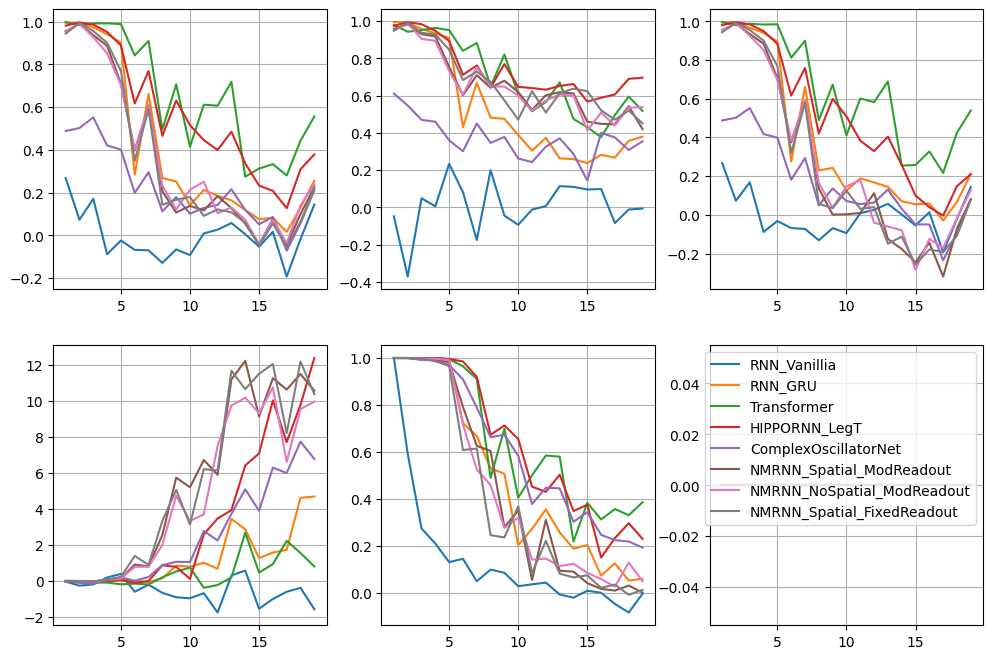

In [16]:
from scipy.ndimage.filters import generic_filter
import numpy as np
import matplotlib.cm as cm

window = 3

keepnetwork = ['RNN_Vanillia', 
               'RNN_GRU', 
               'Transformer', 
               'HIPPORNN_LegT',
               'ComplexOscillatorNet', 
               'NMRNN_Spatial_ModReadout', 
               'NMRNN_NoSpatial_ModReadout', 
               'NMRNN_Spatial_FixedReadout']

keepplot = ['best_val_varex',
            'final_train_varex',
            'final_val_varex',
            'generalization_gap',
            'decodability_r2']

colors = cm.jet(np.linspace(0,1,len(keepnetwork)))

task_complexity = np.arange(1,20,1)

fig, ax = plt.subplots(2,3, figsize = [12,8])

for i,a in enumerate(keepplot):
    data = loaded_sweep_data[a]
    for b in keepnetwork:
        seq = data.item()[b]
        ax[i//3, i%3].plot(task_complexity, seq, label = b)
        if i==4:
            ax[1,2].plot(task_complexity, 0*seq/task_complexity, label = b)
ax[1,2].legend()

/tmp/ipykernel_520/206725580.py:1: DeprecationWarning: Please import `generic_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import generic_filter
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


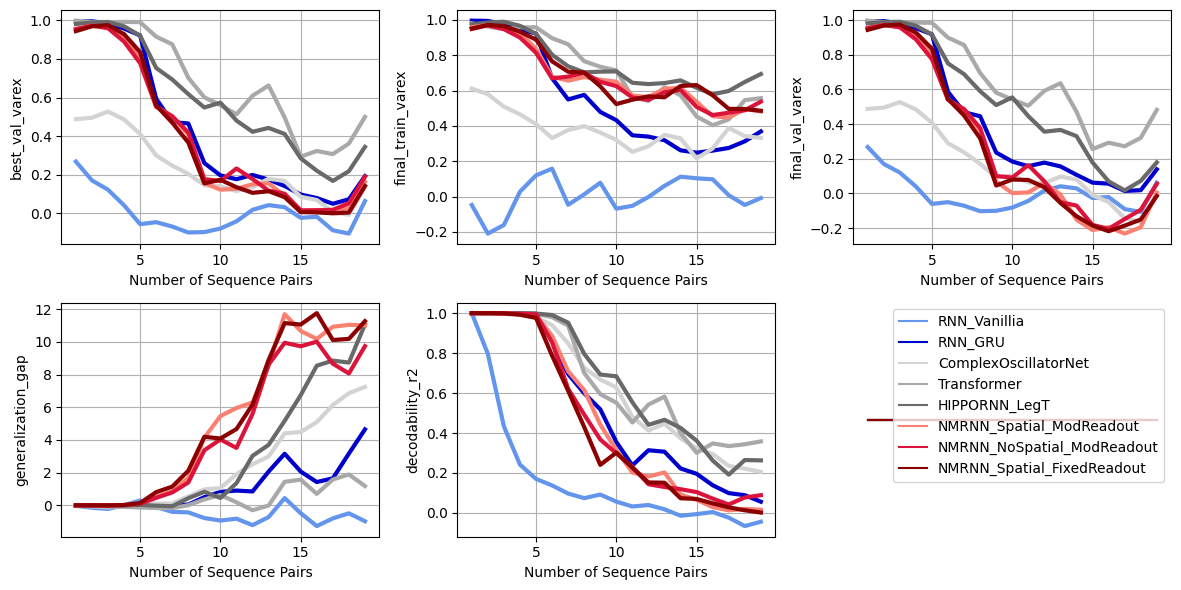

In [26]:
from scipy.ndimage.filters import generic_filter
import numpy as np
import matplotlib.cm as cm

window = 2

keepnetwork = ['RNN_Vanillia', 
               'RNN_GRU', 
               'ComplexOscillatorNet',
               'Transformer', 
               'HIPPORNN_LegT', 
               'NMRNN_Spatial_ModReadout', 
               'NMRNN_NoSpatial_ModReadout', 
               'NMRNN_Spatial_FixedReadout']

import matplotlib.colors as mcolors

def create_custom_color_map(network_list):
    """
    Creates a custom color map for a list of network names.

    Args:
        network_list (list): A list of strings, where each string is a network name.

    Returns:
        dict: A dictionary mapping network names to their corresponding hex color codes.
    """
    color_map = {}
    
    # Define shades of blue for RNNs
    blue_shades = ['#6495ED', '#0000CD']  # CornflowerBlue, MediumBlue
    
    # Define shades of red for NMRNNs
    red_shades = ['#FA8072', '#DC143C', '#8B0000']  # Salmon, Crimson, DarkRed
    
    # Define shades of grey for other models
    grey_shades = ['#D3D3D3', '#A9A9A9', '#696969']  # LightGrey, DarkGrey, DimGrey
    
    rnn_idx = 0
    nmrnn_idx = 0
    other_idx = 0
    
    for network_name in network_list:
        if 'RNN_' in network_name and 'NMRNN' not in network_name and 'HIPPORNN' not in network_name :
            if 'Vanillia' in network_name: # Lighter blue for Vanilla
                 color_map[network_name] = blue_shades[0]
            elif 'GRU' in network_name: # Darker blue for GRU
                 color_map[network_name] = blue_shades[1]
            else: # Generic RNN if more are added later
                if rnn_idx < len(blue_shades):
                    color_map[network_name] = blue_shades[rnn_idx]
                    rnn_idx += 1
                else: # Fallback grey if we run out of predefined blue shades
                    color_map[network_name] = grey_shades[other_idx % len(grey_shades)]
                    other_idx +=1
        elif 'NMRNN' in network_name:
            if nmrnn_idx < len(red_shades):
                color_map[network_name] = red_shades[nmrnn_idx]
                nmrnn_idx += 1
            else: # Fallback grey if we run out of predefined red shades
                color_map[network_name] = grey_shades[other_idx % len(grey_shades)]
                other_idx +=1
        else:
            if other_idx < len(grey_shades):
                color_map[network_name] = grey_shades[other_idx]
                other_idx += 1
            else: # Fallback to a default color if more 'other' models than shades
                 color_map[network_name] = '#000000' # Black as a fallback

    # Specific assignments based on the provided list order and types
    # Ensuring the requested models get their specific colors if the general logic above isn't precise enough
    # For the given list:
    # RNNs: 'RNN_Vanillia', 'RNN_GRU'
    # nmRNNs: 'NMRNN_Spatial_ModReadout', 'NMRNN_NoSpatial_ModReadout', 'NMRNN_Spatial_FixedReadout'
    # Others: 'ComplexOscillatorNet', 'Transformer', 'HIPPORNN_LegT'

    # Re-assigning to ensure the specific requests are met precisely
    # for two RNNs
    color_map['RNN_Vanillia'] = '#6495ED'  # CornflowerBlue (lighter blue)
    color_map['RNN_GRU'] = '#0000CD'     # MediumBlue (darker blue)

    # for three nmRNNs
    color_map['NMRNN_Spatial_ModReadout'] = '#FA8072' # Salmon (lighter red)
    color_map['NMRNN_NoSpatial_ModReadout'] = '#DC143C' # Crimson (medium red)
    color_map['NMRNN_Spatial_FixedReadout'] = '#8B0000' # DarkRed (darker red)
    
    # for three other models
    color_map['ComplexOscillatorNet'] = '#D3D3D3' # LightGrey
    color_map['Transformer'] = '#A9A9A9' # DarkGrey
    color_map['HIPPORNN_LegT'] = '#696969' # DimGrey (darkest grey)
            
    return color_map

network_color_map = create_custom_color_map(keepnetwork)

keepplot = ['best_val_varex',
            'final_train_varex',
            'final_val_varex',
            'generalization_gap',
            'decodability_r2']


task_complexity = np.arange(1,20,1)
numwide = int(3)
fig, ax = plt.subplots(int(np.ceil(6/numwide)),numwide, figsize = [12,6])
if numwide==1:
    ax = ax[:,None]

for i,a in enumerate(keepplot):
    data = loaded_sweep_data[a]
    for iii, b in enumerate(keepnetwork):
        seq = data.item()[b]
        # = generic_filter(I, np.std, size=window)
        seq =  generic_filter(seq, np.mean, size=window)
        seqv =  generic_filter(seq, np.std, size=window)/np.sqrt(32*5)
        if i<3:
            #ax[i//3, i%3].fill_between(task_complexity, 1-(seq)/task_complexity - (1-(seqv)/task_complexity), 1-(seq)/task_complexity + (1-(seqv)/task_complexity), color = colors[iii], alpha = 0.2) 
            ax[i//numwide, i%numwide].plot(task_complexity, seq, label = b, lw = 3, color = network_color_map.get(b, '#FFFFFF'))
        else:
            ax[i//numwide, i%numwide].plot(task_complexity, seq, label = b, lw = 3, color = network_color_map.get(b, '#FFFFFF'))
        if i==4:
            ax[1,2].plot(task_complexity, 0*seq/task_complexity, label = b, color = network_color_map.get(b, '#FFFFFF'))
        ax[i//numwide, i%numwide].set_ylabel(a)
        ax[i//numwide, i%numwide].set_xlabel('Number of Sequence Pairs')
ax[1,2].legend()
ax[1,2].set_axis_off()

plt.tight_layout()

plt.savefig('analysis_ComplexitySweep.eps')

/tmp/ipykernel_520/1310933516.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  other_network_colors = plt.cm.get_cmap('tab10', len(network_list))


Plots saved as 'analysis_ComplexitySweep_BarPlots_N5.eps' and '.png'


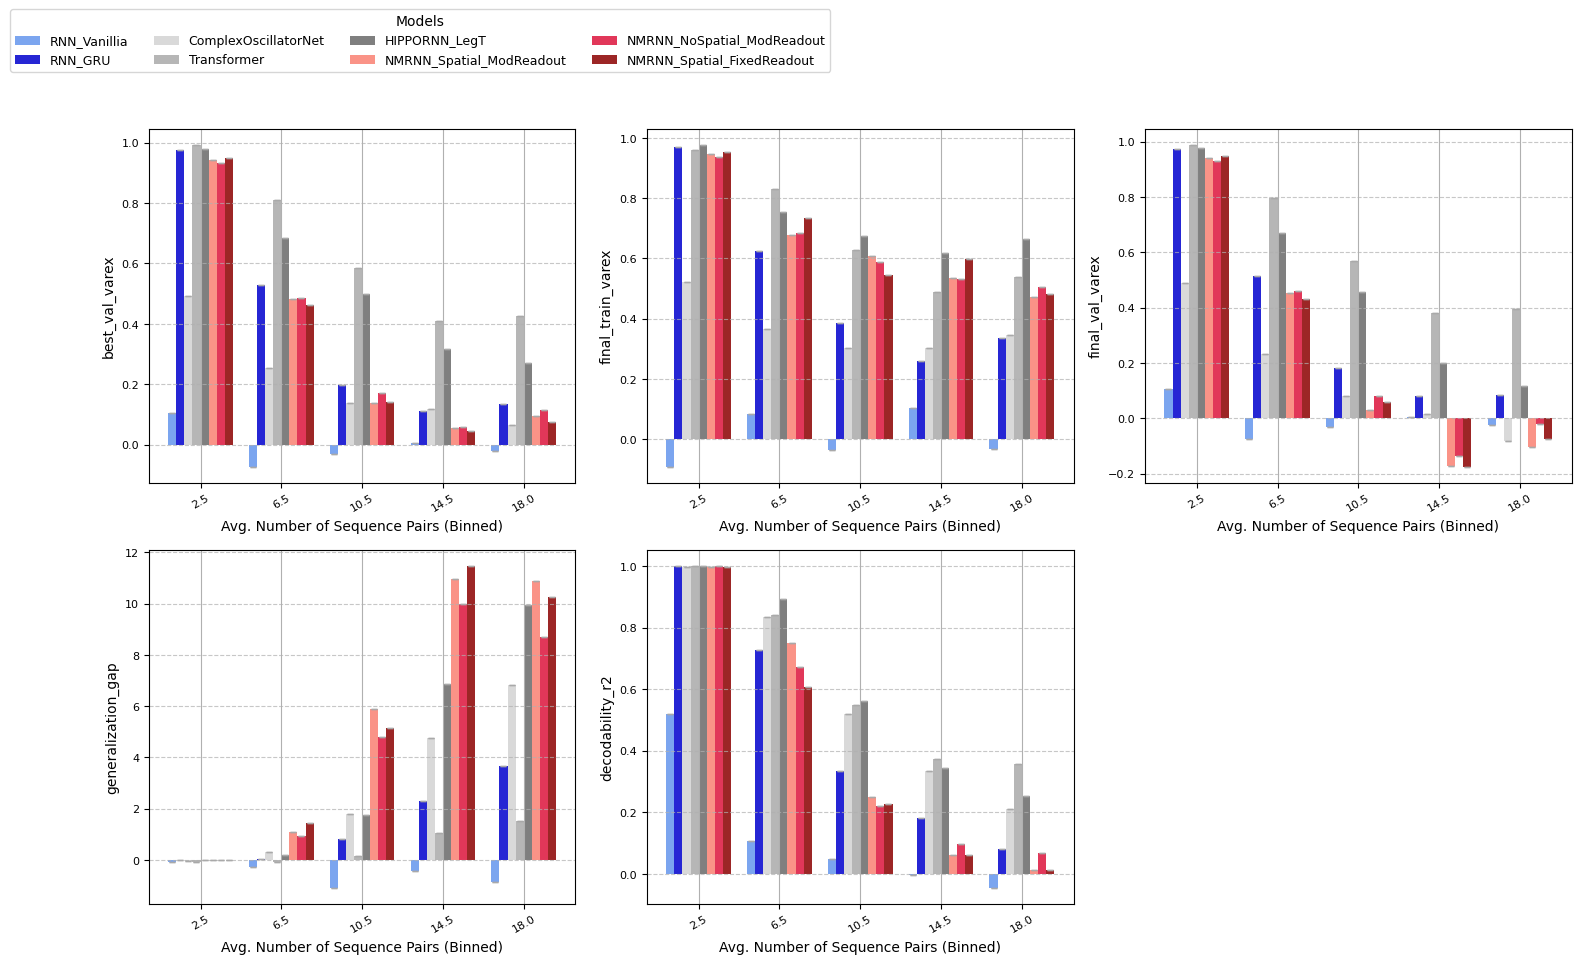

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import generic_filter

# --- Configuration and Data (Assume these are pre-defined as in your script) ---
window = 1
N_target_points = 5 # Desired number of points on the x-axis

keepnetwork = ['RNN_Vanillia',
               'RNN_GRU',
               'ComplexOscillatorNet',
               'Transformer',
               'HIPPORNN_LegT',
               'NMRNN_Spatial_ModReadout',
               'NMRNN_NoSpatial_ModReadout',
               'NMRNN_Spatial_FixedReadout']

keepplot = ['best_val_varex',
            'final_train_varex',
            'final_val_varex',
            'generalization_gap',
            'decodability_r2']

task_complexity_x_values_original = np.arange(1, 20, 1) # Original X-axis values


def create_custom_color_map(network_list):
    color_map = {}
    blue_shades = ['#6495ED', '#0000CD']
    red_shades = ['#FA8072', '#DC143C', '#8B0000']
    grey_shades = ['#D3D3D3', '#A9A9A9', '#696969']

    color_map['RNN_Vanillia'] = blue_shades[0]
    color_map['RNN_GRU'] = blue_shades[1]
    color_map['NMRNN_Spatial_ModReadout'] = red_shades[0]
    color_map['NMRNN_NoSpatial_ModReadout'] = red_shades[1]
    color_map['NMRNN_Spatial_FixedReadout'] = red_shades[2]
    color_map['ComplexOscillatorNet'] = grey_shades[0]
    color_map['Transformer'] = grey_shades[1]
    color_map['HIPPORNN_LegT'] = grey_shades[2]

    other_network_colors = plt.cm.get_cmap('tab10', len(network_list))
    color_idx = 0
    for network_name in network_list:
        if network_name not in color_map:
            all_used_colors = set(color_map.values())
            available_blues = [c for c in blue_shades if c not in all_used_colors]
            available_reds = [c for c in red_shades if c not in all_used_colors]
            available_greys = [c for c in grey_shades if c not in all_used_colors]
            if 'RNN_' in network_name and available_blues: color_map[network_name] = available_blues[0]
            elif 'NMRNN' in network_name and available_reds: color_map[network_name] = available_reds[0]
            elif available_greys: color_map[network_name] = available_greys[0]
            else:
                color_map[network_name] = mcolors.to_hex(other_network_colors(color_idx / len(network_list)))
                color_idx +=1
    return color_map

network_color_map = create_custom_color_map(keepnetwork)

num_metrics = len(keepplot)
num_networks = len(keepnetwork)

numwide = int(3)
numhigh = int(np.ceil(num_metrics / numwide))

fig, axes = plt.subplots(numhigh, numwide, figsize=[15, numhigh * 4.5], squeeze=False)
axes_flat = axes.flatten()

for i in range(num_metrics, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# --- Binning and Averaging Setup ---
original_indices = np.arange(len(task_complexity_x_values_original))
# Create bins of indices from the original data
index_bins = np.array_split(original_indices, N_target_points)

# Calculate the new x-axis labels (mean of original task complexity values in each bin)
task_complexity_labels_reduced = []
for bin_indices in index_bins:
    if len(bin_indices) > 0:
        new_x_label = np.mean(task_complexity_x_values_original[bin_indices])
        task_complexity_labels_reduced.append(new_x_label)
    else: # Should not happen with np.array_split on non-empty array
        task_complexity_labels_reduced.append(np.nan)
task_complexity_labels_reduced = np.array(task_complexity_labels_reduced)


# --- Bar Plotting ---
bar_group_width_fraction = 0.8
single_bar_width = bar_group_width_fraction / num_networks
# X locations for the groups on the plot (0, 1, 2, ..., N_target_points-1)
x_plot_indices = np.arange(N_target_points)

for metric_idx, metric_name in enumerate(keepplot):
    ax = axes_flat[metric_idx]
    data_for_metric = loaded_sweep_data[metric_name].item()

    for network_idx, network_name in enumerate(keepnetwork):
        raw_seq_data = data_for_metric.get(network_name)

        if raw_seq_data is None:
            print(f"Warning: Data for network '{network_name}' not found in metric '{metric_name}'. Skipping.")
            continue
        if len(raw_seq_data) != len(task_complexity_x_values_original):
            print(f"Warning: Data length mismatch for {network_name} - {metric_name}. Expected {len(task_complexity_x_values_original)}, got {len(raw_seq_data)}. Adjusting.")
            if len(raw_seq_data) > len(task_complexity_x_values_original):
                raw_seq_data = raw_seq_data[:len(task_complexity_x_values_original)]
            else:
                raw_seq_data = np.pad(raw_seq_data, (0, len(task_complexity_x_values_original) - len(raw_seq_data)), 'edge')

        # 1. Apply filtering to the original full data
        seq_mean_full = generic_filter(raw_seq_data, np.mean, size=window, mode='mirror')
        seq_std_dev_in_window_full = generic_filter(raw_seq_data, np.std, size=window, mode='mirror')
        # Assuming N_samples_for_SEM (e.g., 32*5) is the number of samples underlying each point in raw_seq_data
        N_samples_for_SEM = 32 * 5 # Make this configurable if it varies
        seq_error_full = seq_std_dev_in_window_full / np.sqrt(N_samples_for_SEM)

        # 2. Bin and average the filtered results
        seq_mean_reduced = []
        seq_error_reduced = []

        for bin_indices in index_bins:
            if len(bin_indices) == 0: # Should not occur if original data is not empty
                seq_mean_reduced.append(np.nan)
                seq_error_reduced.append(np.nan)
                continue

            # Average seq_mean for this bin
            current_bin_seq_means = seq_mean_full[bin_indices]
            seq_mean_reduced.append(np.mean(current_bin_seq_means))

            # Combine errors for this bin: SE_of_mean_of_means = sqrt(sum(SE_i^2)) / k
            current_bin_seq_errors = seq_error_full[bin_indices]
            if len(current_bin_seq_errors) > 0:
                # Ensure no NaNs in errors before squaring, or handle them
                valid_errors = current_bin_seq_errors[~np.isnan(current_bin_seq_errors)]
                if len(valid_errors) > 0:
                    combined_error = np.sqrt(np.sum(valid_errors**2)) / len(valid_errors)
                else:
                    combined_error = np.nan # if all errors in bin are NaN
            else:
                combined_error = np.nan # Should not happen if bin_indices is not empty
            seq_error_reduced.append(combined_error)

        seq_mean_reduced = np.array(seq_mean_reduced)
        seq_error_reduced = np.array(seq_error_reduced)

        # Use the reduced task complexity labels for transformation
        # Ensure it has the same length as seq_mean_reduced (N_target_points)
        current_task_complexity_reduced = task_complexity_labels_reduced.astype(float)
        current_task_complexity_reduced[np.isnan(current_task_complexity_reduced)] = 1e-9 # Avoid NaN issues
        current_task_complexity_reduced[current_task_complexity_reduced == 0] = 1e-9 # Avoid division by zero


        y_values = seq_mean_reduced
        y_errors = seq_error_reduced
        
        # Handle potential NaNs in y_values or y_errors if underlying data was problematic
        y_values = np.nan_to_num(y_values)
        y_errors = np.nan_to_num(y_errors)


        bar_offset = (network_idx - num_networks / 2) * single_bar_width + single_bar_width / 2
        bar_positions = x_plot_indices + bar_offset

        ax.bar(bar_positions, y_values, width=single_bar_width,
               label=network_name if metric_idx == 0 else None,
               color=network_color_map.get(network_name, '#333333'),
               yerr=y_errors, capsize=2, ecolor='darkgrey', alpha=0.85)

    ax.set_ylabel(metric_name, fontsize=10)
    ax.set_xlabel('Avg. Number of Sequence Pairs (Binned)', fontsize=10)
    ax.set_xticks(x_plot_indices)
    # Format labels to 1 decimal place
    ax.set_xticklabels([f"{label:.1f}" for label in task_complexity_labels_reduced])
    ax.tick_params(axis='x', rotation=30, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if metric_idx < 3 or 'gap' in metric_name :
        pass
    elif 'decodability_r2' in metric_name:
        # Ensure y_lim does not try to operate on NaNs if all data was NaN
        current_y_lim = ax.get_ylim()
        min_y = 0 if np.isnan(current_y_lim[0]) else current_y_lim[0]
        max_y = 1.05 if np.isnan(current_y_lim[1]) else current_y_lim[1]
        ax.set_ylim(min(0, min_y), max(1.05, max_y))


handles, labels = [], []
if num_metrics > 0:
    temp_handles, temp_labels = axes_flat[0].get_legend_handles_labels()
    for handle, label in zip(temp_handles, temp_labels):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

if handles and labels:
    fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.5, 0.99), ncol=min(num_networks, 4), fontsize=9, title="Models", title_fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])

try:
    plt.savefig('analysis_ComplexitySweep_BarPlots_N5.pdf', format='pdf', bbox_inches='tight')
    plt.savefig('analysis_ComplexitySweep_BarPlots_N5.png', format='png', dpi=300, bbox_inches='tight')
    print("Plots saved as 'analysis_ComplexitySweep_BarPlots_N5.eps' and '.png'")
except Exception as e:
    print(f"Error saving plot: {e}")

plt.show()